<a href="https://colab.research.google.com/github/swathise/ew30050-classwork4/blob/main/classwork4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]],size=100)

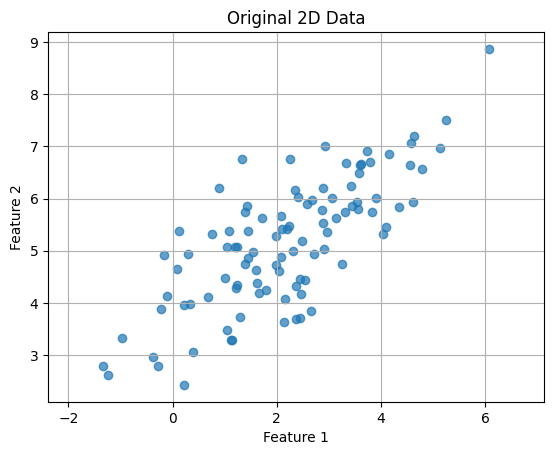

In [43]:

plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

In [44]:
x_centered = X - np.mean(X,axis=0)

In [45]:
cov_matrix = np.cov(x_centered.T)

In [46]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [47]:
first_pc = eig_vecs[:, 0]
x_pca_1d = x_centered.dot(first_pc)

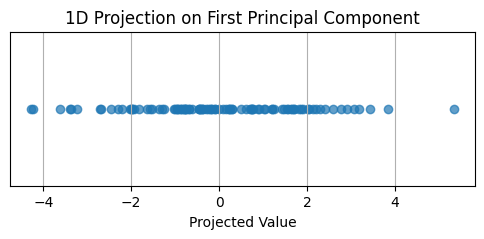

In [48]:
plt.figure(figsize=(6, 2))
plt.scatter(x_pca_1d, np.zeros_like(x_pca_1d), alpha=0.7)
plt.title("1D Projection on First Principal Component")
plt.xlabel("Projected Value")
plt.yticks([])
plt.grid(True)
plt.show()

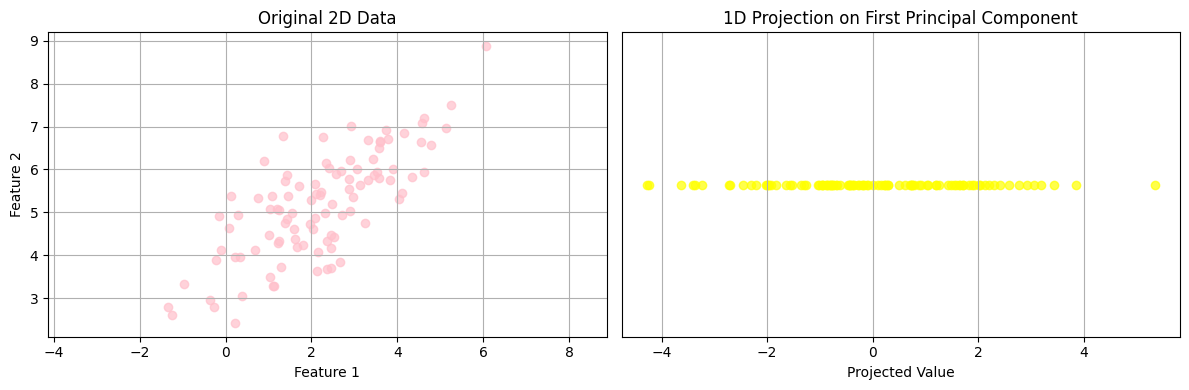

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color='pink')
axs[0].set_title("Original 2D Data")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[0].axis("equal")
axs[0].grid(True)

axs[1].scatter(x_pca_1d, np.zeros_like(x_pca_1d), alpha=0.7, color='yellow')
axs[1].set_title("1D Projection on First Principal Component")
axs[1].set_xlabel("Projected Value")
axs[1].set_yticks([])
axs[1].grid(True)

plt.tight_layout()
plt.show()

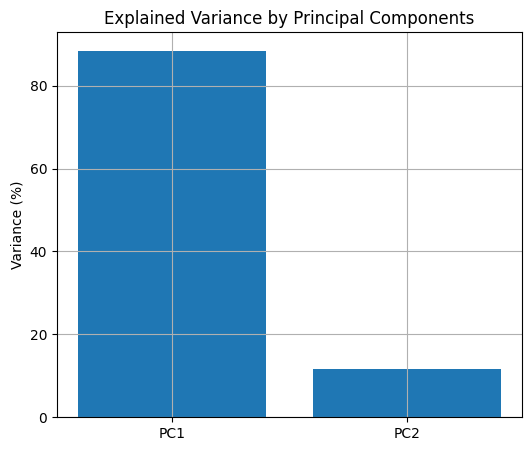

In [50]:
explained_variance = eig_vals / np.sum(eig_vals)
plt.figure(figsize=(6, 5))
plt.bar(["PC1", "PC2"], explained_variance * 100)
plt.title("Explained Variance by Principal Components")
plt.ylabel("Variance (%)")
plt.grid(True)
plt.show()

In [26]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
# Load dataset
digits = load_digits()
X = digits.data  # (1797, 64)
y = digits.target  # Labels: 0–9

print("Shape of x,y:", X.shape)



Shape of x,y: (1797, 64)


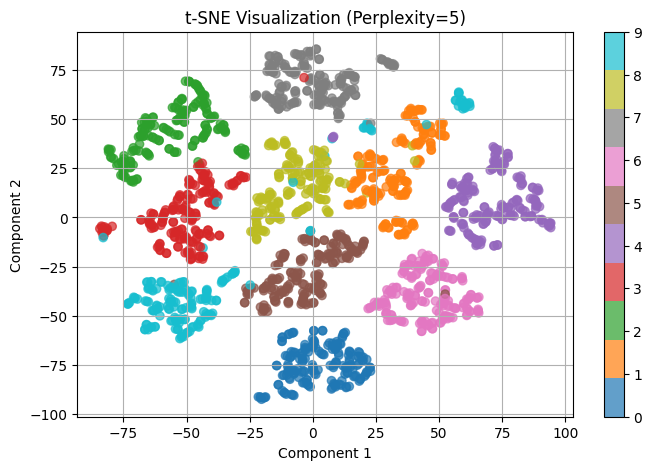

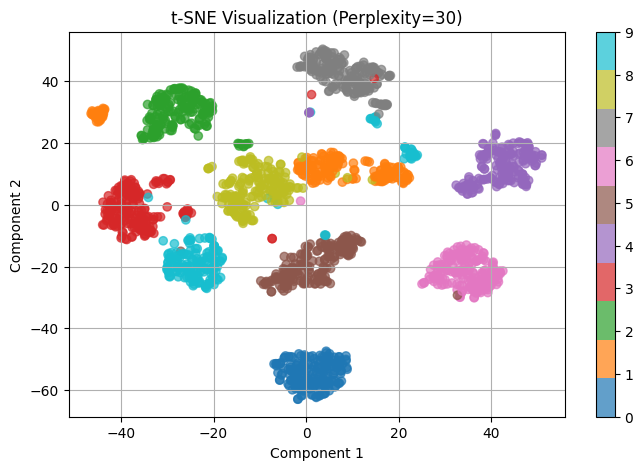

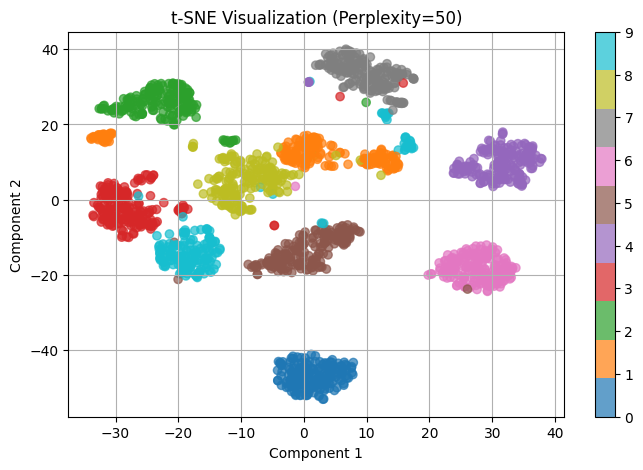

In [62]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data  # shape (1797, 64)
y = digits.target

for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()
